In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [6]:
history = pd.read_csv("TCS_stock_history.csv")
info = pd.read_csv("TCS_stock_info.csv")
action = pd.read_csv("TCS_stock_action.csv")

In [9]:
history['Date'] = pd.to_datetime(history['Date'])
history.sort_values(by='Date', inplace=True)
history.fillna(method='ffill', inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_23336\3041283986.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  history.fillna(method='ffill', inplace=True)


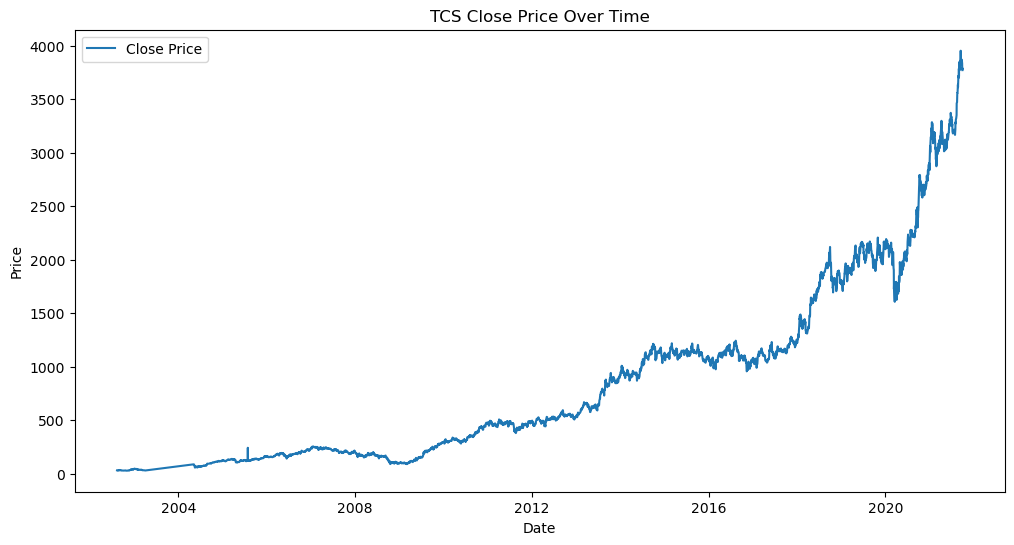

In [10]:
plt.figure(figsize=(12,6))
plt.plot(history['Date'], history['Close'], label='Close Price')
plt.title('TCS Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

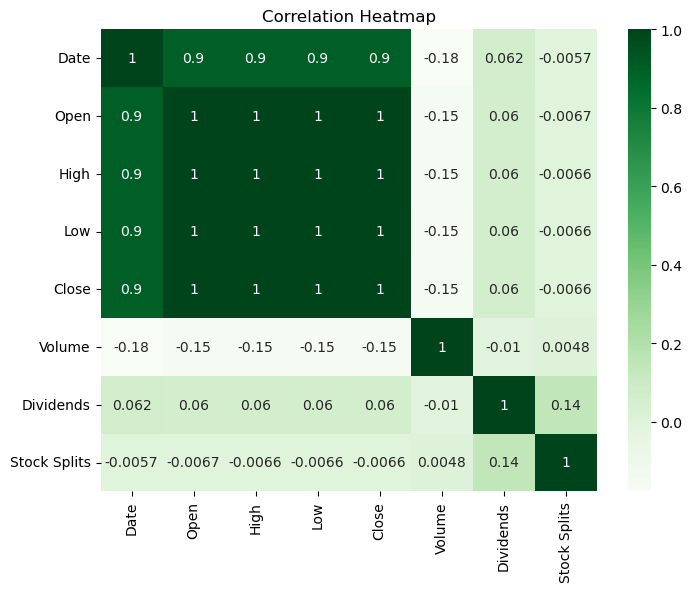

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(history.corr(), annot=True, cmap='Greens')
plt.title("Correlation Heatmap")
plt.show()

In [12]:
history['MA30'] = history['Close'].rolling(30).mean()
history['MA50'] = history['Close'].rolling(50).mean()

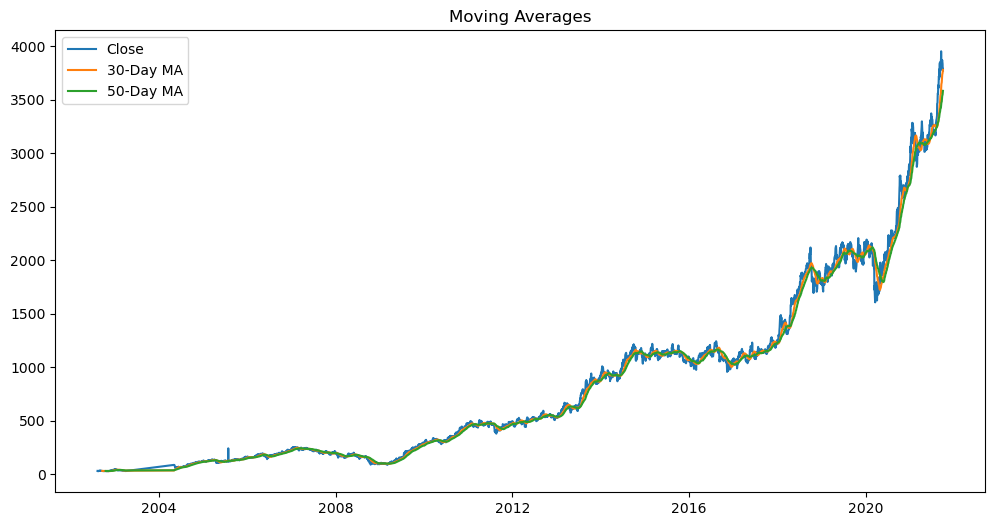

In [13]:
plt.figure(figsize=(12,6))
plt.plot(history['Date'], history['Close'], label='Close')
plt.plot(history['Date'], history['MA30'], label='30-Day MA')
plt.plot(history['Date'], history['MA50'], label='50-Day MA')
plt.legend()
plt.title("Moving Averages")
plt.show()

In [14]:
history['Year'] = history['Date'].dt.year
history['Month'] = history['Date'].dt.month
history['Day'] = history['Date'].dt.day
history['DayOfWeek'] = history['Date'].dt.dayofweek
history['Prev_Close'] = history['Close'].shift(1)
history.dropna(inplace=True)

In [15]:
X = history[['Open','High','Low','Volume','Prev_Close','Month','DayOfWeek']]
y = history['Close']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))
print("Linear Regression R2:", r2_score(y_test, y_pred))

Linear Regression MSE: 46.23592895451324
Linear Regression R2: 0.9999318406462082


In [16]:
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(history[['Close']])

X_lstm = scaled_close[:-1]
y_lstm = scaled_close[1:]
print("LSTM Ready Dataset Shape:", X_lstm.shape)

LSTM Ready Dataset Shape: (4413, 1)
